# Diabetes

In [1]:
import pyAgrum as gum
import pandas as pd
import numpy as np
import pyAgrum.lib.notebook as gnb

In [3]:
df = pd.read_csv('data/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df=df.drop_duplicates()

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution


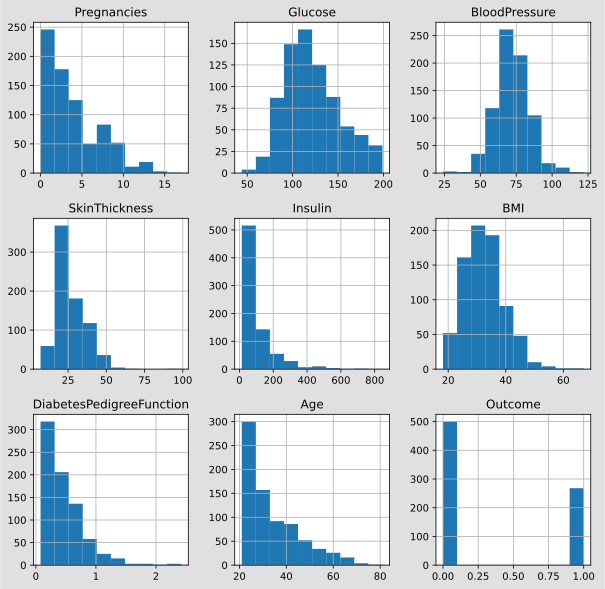

In [9]:
import matplotlib.pyplot as plt
df.hist(bins=10,figsize=(10,10))
plt.show()

In [10]:
def forAge(row):
    try:
        age = float(row['Age'])
        if age < 1:
            #return '[0;1['
            return 'baby'
        elif age < 6:
            #return '[1;6['
            return 'toddler'
        elif age < 12:
            #return '[6;12['
            return 'kid'
        elif age < 21:
            #return '[12;21['
            return 'teen'
        elif age < 80:
            #return '[21;80['
            return 'adult'
        else:
            #return '[80;200]'
            return 'old'
    except ValueError:
        return np.nan

In [11]:
def forPedigree(row):
    try:
        pedigree = float(row['DiabetesPedigreeFunction'])
        if pedigree < 1:
            #return '[0;1['
            return 'low'
        else:
            #return '[80;200]'
            return 'high'
    except ValueError:
        return np.nan

In [12]:
def forPregnancies(row):
    try:
        preg = float(row['Pregnancies'])
        if preg < 1:
            return 'any'
        elif preg < 3:
            return 'less of 3'
        else:
            return 'more or iqual of 3'
    except ValueError:
        return np.nan

In [13]:
newdf = pd.DataFrame()
newdf['Age'] = df.apply(forAge, axis=1)
newdf['DiabetesPedigreeFunction'] = df.apply(forPedigree, axis=1)
newdf['Pregnancies'] = df.apply(forPregnancies, axis=1)
newdf['Diabetes'] = df['Outcome'].map({0:'no', 1:'yes'})

In [14]:
newdf


,Age,DiabetesPedigreeFunction,Pregnancies,Diabetes
0,adult,low,more or iqual of 3,yes
1,adult,low,less of 3,no
2,adult,low,more or iqual of 3,yes
3,adult,low,less of 3,no
4,adult,high,any,yes
...,...,...,...,...
763,adult,low,more or iqual of 3,no
764,adult,low,less of 3,no
765,adult,low,more or iqual of 3,no
766,adult,low,less of 3,yes


In [15]:
newdf['Diabetes'].value_counts()

no     500
yes    268
Name: Diabetes, dtype: int64

In [16]:
newdf.pivot_table(index='Diabetes', columns='Age',
                        aggfunc='size', fill_value=0)

Age,adult,old
Diabetes,,
no,499,1
yes,268,0


In [17]:
newdf.pivot_table(index='Diabetes', columns='DiabetesPedigreeFunction',
                  aggfunc='size', fill_value=0)

DiabetesPedigreeFunction,high,low
Diabetes,,
no,22,478
yes,29,239


In [18]:
newdf.pivot_table(index='Diabetes', columns='Pregnancies',
                  aggfunc='size', fill_value=0)

Pregnancies,any,less of 3,more or iqual of 3
Diabetes,,,
no,73,190,237
yes,38,48,182


In [19]:
bn = gum.BayesNet("Diabetes prediction")
bn =gum.fastBN("Age{baby|toddler|kid|teen|adult|old}<-Diabetes{no|yes}->Pedigree{low|high};Diabetes->Pregnancies{any|less of 3|more or iqual of 3}")
print(bn.variable("Diabetes"))
print(bn.variable("Age"))
print(bn.variable("Pedigree"))
print(bn.variable("Pregnancies"))
bn

Diabetes:Labelized({no|yes})
Age:Labelized({baby|toddler|kid|teen|adult|old})
Pedigree:Labelized({low|high})
Pregnancies:Labelized({any|less of 3|more or iqual of 3})


(pyAgrum.BayesNet<double>@0x7ffa67ba3c00) BN{nodes: 4, arcs: 3, domainSize: 72, dim: 17, mem: 192o}

In [20]:
bn.cpt('Diabetes')[:] = [500, 268]
bn.cpt('Diabetes').normalizeAsCPT()
bn.cpt('Diabetes')

(pyAgrum.Potential<double>@0x7ffa6cc04f70) 
  Diabetes         |
no       |yes      |
---------|---------|
 0.6510  | 0.3490  |

In [21]:
bn.cpt('Age')[{'Diabetes':'no'}] = [0, 0, 0, 0, 499, 1]
bn.cpt('Age')[{'Diabetes':'yes'}] = [0, 0, 0, 0, 268, 0]
bn.cpt('Age').normalizeAsCPT()
bn.cpt('Age')

(pyAgrum.Potential<double>@0x7ffa6cc05360) 
      ||  Age                                                      |
Diabet||baby     |toddler  |kid      |teen     |adult    |old      |
------||---------|---------|---------|---------|---------|---------|
no    || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.9980  | 0.0020  |
yes   || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  | 0.0000  |

In [22]:
bn.cpt('Pedigree')[{'Diabetes':'no'}] = [478,22]
bn.cpt('Pedigree')[{'Diabetes':'yes'}] = [239,29]
bn.cpt('Pedigree').normalizeAsCPT()
bn.cpt('Pedigree')

(pyAgrum.Potential<double>@0x7ffa6aeb49e0) 
      ||  Pedigree         |
Diabet||low      |high     |
------||---------|---------|
no    || 0.9560  | 0.0440  |
yes   || 0.8918  | 0.1082  |

In [23]:
bn.cpt('Pregnancies')[{'Diabetes':'no'}] = [73,190,237]
bn.cpt('Pregnancies')[{'Diabetes':'yes'}] = [38,48,182]
bn.cpt('Pregnancies').normalizeAsCPT()
bn.cpt('Pregnancies')

(pyAgrum.Potential<double>@0x7ffa6cc04b40) 
      ||  Pregnancies                |
Diabet||any      |less of 3|more or i|
------||---------|---------|---------|
no    || 0.1460  | 0.3800  | 0.4740  |
yes   || 0.1418  | 0.1791  | 0.6791  |

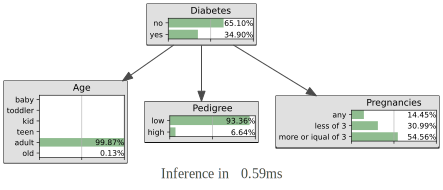

In [24]:
gnb.showInference(bn,size="10")

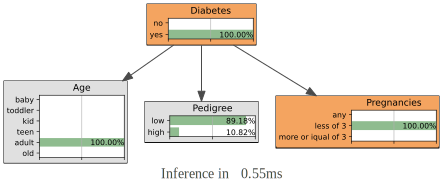

In [26]:
gnb.showInference(bn,size="10", evs={'Diabetes':'yes', 'Pregnancies':'less of 3'})

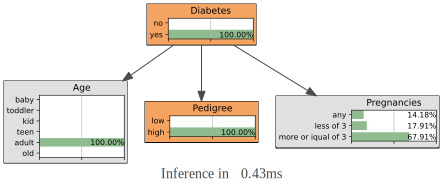

In [31]:
gnb.showInference(bn,size="10", evs={'Diabetes':'yes', 'Pedigree':'high'})